<a href="https://colab.research.google.com/github/alliekwolf/Linear_Algebra_Coding_Projects/blob/main/The_Ski_Hill_Transition_Matrices_and_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize the preliminary code:


In [2]:
import numpy as np
from numpy import c_

ll = "loaded"

The local downhill ski organization wants to know the usage rate for their four different ski runs. A consultant watched skiers one morning and tracked where they went after each run from the Bunny hill, Green triangle, Double black diamon, and Mogul runs. The information is summarized below:

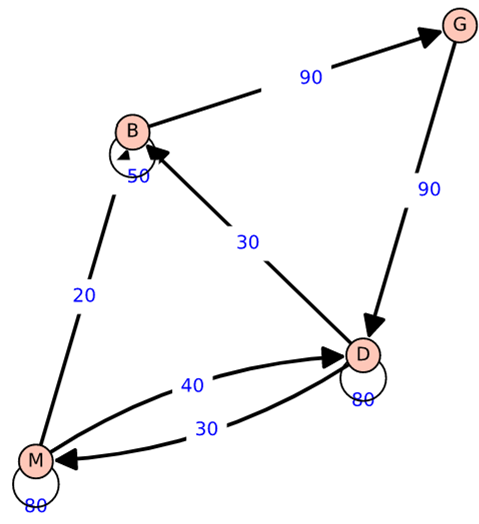

The Chalet wants to put up advertising targeting the most number of skiers for their daily lunch special. Using the information above, develop a model that tracks skiers on the runs during the day.

Note: The data was collected on a Monday morning, a day when not very many people are skiing. There are usually 980 skiers who leave the Chalet and start at the bunny hill on a typical weekend morning.

# Prepare a model

We construct a matrix equation model $$ M x_0 = x_1 $$ for the system. Although there were 140 people on the bunny hill when the data was collected, assume there were 980 skiers that start at the bunny hill. 

In [3]:
# create the matrix M:
M = np.matrix([[50/140, 0, 30/140, 20/140],
               [90/140, 0, 0, 0],
               [0, 90/90, 80/140, 40/140],
               [0, 0, 30/140, 80/140]])
M

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714],
        [0.64285714, 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.57142857, 0.28571429],
        [0.        , 0.        , 0.21428571, 0.57142857]])

In [4]:
x0 = np.matrix([[980], [0], [0], [0]])
x0

matrix([[980],
        [  0],
        [  0],
        [  0]])

In [22]:
M*x0

matrix([[350.],
        [630.],
        [  0.],
        [  0.]])

#Question #5:
Assume 980 skiers start skiing at 8:00am on a Saturday.  All skiers must start on the Bunny Hill, so we coudl represent this as a vector  (e.g. $$ \vec{x}_0 = \left( \begin{array}{c} 980 \\ 0 \\ 0 \\ 0 \\ \end{array} \right) $$

Modify the code below to determine where skiers go on the following runs:

Run                  | Run 0 | Run 1 | Run 2 | Run 3 | Run 4 | Run 5 | Run 10 | Run 15 
---                  |  ---  |  ---  |  ---  |  ---  |  ---  |  ---  |  ---  |  ---
Bunny Hill           |  980  |  350  |  125  |  180  |  209  |  201  |  195   |  195  
Green Triangle       |   0   |  630  |  225  |   80  |  115  |  134  |  126   |  126  
Double Black Diamond |   0   |   0   |  630  |  585  |  453  |  432  |  439   |  439  
Moguls               |   0   |   0   |   0   |  135  |  203  |  213  |  220   |  220  




In [6]:
# Compute where skiers are after one ski run:

M*x0

matrix([[350.],
        [630.],
        [  0.],
        [  0.]])

In [23]:
#  We can take powers of M using the ** operator.

#  So, M**2  * x0 is the same as  M * M * x0

M ** 2  * x0

matrix([[125.],
        [225.],
        [630.],
        [  0.]])

In [24]:
#  The initial state of the system:
x0 = np.matrix([[980], [0], [0], [0]])

#Make a matrix, where each column is the result 
#of applying the matrix multiple times to the initial state x0:

X = np.c_[x0, M*x0, M**2 * x0, M**3 * x0, M**4 * x0, M**5 * x0, M**10 * x0, M**15 * x0]

#print out the X matrix, rounding the entries to 2 decimal places
print(X.round(2))


[[980.   350.   125.   179.64 208.8  200.62 195.31 195.3 ]
 [  0.   630.   225.    80.36 115.48 134.23 125.64 125.55]
 [  0.     0.   630.   585.   453.21 432.32 439.48 439.43]
 [  0.     0.     0.   135.   202.5  212.83 219.57 219.71]]


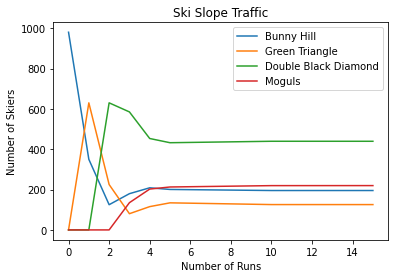

In [25]:
import matplotlib.pyplot as plt
 
x  = [0, 1, 2, 3, 4, 5, 10, 15]
plt.plot(x, np.array(X[0])[0], label="Bunny Hill")
plt.plot(x, np.array(X[1])[0], label="Green Triangle")
plt.plot(x, np.array(X[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(X[3])[0], label="Moguls")
plt.plot()

plt.xlabel("Number of Runs")
plt.ylabel("Number of Skiers")
plt.title("Ski Slope Traffic")
plt.legend()
plt.show()

# Question 6:

Each ski run and chair lift ride takes approximately 12 minutes.  Where should the Chalet place their billboard to reach the maximum number of skiers just before lunch?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.

In [27]:
# create the matrix M:
M = np.matrix([[50/140, 0, 30/140, 20/140],
               [90/140, 0, 0, 0],
               [0, 90/90, 80/140, 40/140],
               [0, 0, 30/140, 80/140]])
M

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714],
        [0.64285714, 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.57142857, 0.28571429],
        [0.        , 0.        , 0.21428571, 0.57142857]])

*ANSWER:  Because a run takes and lift ride take 12 minutes, a skier can have 5 runs in an hour. If skiers start at 8:00 a.m., they can have 20 runs before lunch if they ski until noon.*

In [28]:
# multiply the initial run (r0) by matrix M^20:
r0 = np.matrix([[980], [0], [0], [0]])
M**20 * r0

matrix([[195.30249244],
        [125.5516033 ],
        [439.4306285 ],
        [219.71527575]])

*ANSWER: The Chalet should place their billboard on the Double Black Diamond to reach the greatest number of skiers just before lunch.*

# Question 7:

Does our answer change if the skiers were able to do one more run in the morning than you had estimated?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.


In [29]:
# multiply the initial run (r0) by matrix (M^20)+1:
r0 = np.matrix([[980], [0], [0], [0]])
M**21 * r0

matrix([[195.3024928 ],
        [125.55160228],
        [439.43061266],
        [219.71529225]])

*ANSWER:  No, one more run does not make a difference.*

#Homework for Markov Chanins and Skiing

Answer the following two situations on the printed homework.  The questions are copied here for your convenience - but you will turn in your homework pages with your answers written on those pages.

## Situation 1:  

We use the same set-up as the previous ski problem, except that we assume these changes to the initial data used to form matrix $M$:

* After each run, 20 skiers from the Green Triangle head to the Chalet instead of to the Double Black Diamond.
* After each run, 30 skiers from the Double Black Diamond go to the Chalet instead of going back to the Double Black Diamond run.
* On each run, all skiers leaving the lodge go to the Bunny Hill.


## HW 1:

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

In [32]:
# create the matrix M1:
M1 = np.matrix([[50/140, 0, 30/140, 20/140, 1],
               [90/140, 0, 0, 0, 0],
               [0, 70/90, 50/140, 40/140, 0],
               [0, 0, 30/140, 80/140, 0],
               [0, 20/90, 30/140, 0, 0]])
M1

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714, 1.        ],
        [0.64285714, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.77777778, 0.35714286, 0.28571429, 0.        ],
        [0.        , 0.        , 0.21428571, 0.57142857, 0.        ],
        [0.        , 0.22222222, 0.21428571, 0.        , 0.        ]])

*ANSWER:  I modified the system above by adding a 5th column to represent skiers coming from the Chalet and going to another hill after each run, and a 5th row to represent the number of skiers going to the Chalet from another hill after each run.*

## HW 2: 

Long term, did changing the system affect which ski run was most popular?

Note:  It may be helpful to copy some of the code from above to answer this question. 

In [33]:
# Make a matrix (R), where each column is the result 
# of applying the matrix multiple times to the initial state r0:
r0 = np.matrix([[980], [0], [0], [0], [0]])
R = np.c_[r0, M1*r0, M1**2 * r0, M1**3 * r0, M1**4 * r0, M1**5 * r0, M1**10 * r0, M1**15 * r0]

# print out the R matrix, rounding the entries to 2 decimal places
print(R.round(2))

[[980.   350.   125.   289.64 348.44 283.19 278.16 280.06]
 [  0.   630.   225.    80.36 186.2  224.   179.84 179.88]
 [  0.     0.   490.   350.   217.5  261.07 282.57 280.02]
 [  0.     0.     0.   105.   135.   123.75 138.71 139.99]
 [  0.     0.   140.   155.    92.86  87.98 100.72 100.05]]


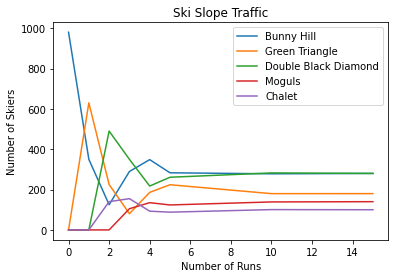

In [34]:
import matplotlib.pyplot as plt

r  = [0, 1, 2, 3, 4, 5, 10, 15]
plt.plot(r, np.array(R[0])[0], label="Bunny Hill")
plt.plot(r, np.array(R[1])[0], label="Green Triangle")
plt.plot(r, np.array(R[2])[0], label="Double Black Diamond")
plt.plot(r, np.array(R[3])[0], label="Moguls")
plt.plot(r, np.array(R[4])[0], label="Chalet")
plt.plot()

plt.xlabel("Number of Runs")
plt.ylabel("Number of Skiers")
plt.title("Ski Slope Traffic")
plt.legend()
plt.show()

*ANSWER:  Yes, changing the data does affect which ski run is most popular long-term. In this case, the Bunny Hill is now leads as most popular over the Double Black Diamond by a very narrow margin.*

# Situation 2:  

People who enter the ski lodge don't return immediately to the Bunny Hill. Instead, they get hot chocolate and sit for, in effect, 3 ski runs. In this situation, where do most people spend their time during a day of skiing?

## HW 3:  

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

In [35]:
# create the matrix M2:
M2 = np.matrix([[50/140, 0, 30/140, 20/140, 1/3],
               [90/140, 0, 0, 0, 0],
               [0, 70/90, 50/140, 40/140, 0],
               [0, 0, 30/140, 80/140, 0],
               [0, 20/90, 30/140, 0, 2/3]])
M2

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714, 0.33333333],
        [0.64285714, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.77777778, 0.35714286, 0.28571429, 0.        ],
        [0.        , 0.        , 0.21428571, 0.57142857, 0.        ],
        [0.        , 0.22222222, 0.21428571, 0.        , 0.66666667]])

*ANSWER:  At first I wasn't exactly sure how to account for skiers staying at the Chalet for the equivalent of 3 runs when this matrix is supposed to account for the comings and goings of skiers after each run. I decided to adjust the matrix so that after each run, a third of all skiers at the Chalet return to the Bunny Hill, while the rest remain at the Chalet.*

## HW 4:

Long term, did changing the system affect which ski run was most popular?

In [36]:
# Make a matrix (R), where each column is the result 
# of applying the matrix multiple times to the initial state r0:
r0 = np.matrix([[980], [0], [0], [0], [0]])
R = np.c_[r0, M2*r0, M2**2 * r0, M2**3 * r0, M2**4 * r0, M2**5 * r0, M2**10 * r0, M2**15 * r0]

# print out the R matrix, rounding the entries to 2 decimal places
print(R.round(2))

[[980.   350.   125.   196.31 242.89 238.78 232.49 232.53]
 [  0.   630.   225.    80.36 126.2  156.14 149.53 149.48]
 [  0.     0.   490.   350.   217.5  214.4  232.54 232.56]
 [  0.     0.     0.   105.   135.   123.75 116.63 116.31]
 [  0.     0.   140.   248.33 258.41 246.93 248.82 249.12]]


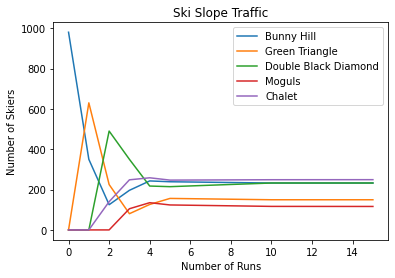

In [37]:
import matplotlib.pyplot as plt

r  = [0, 1, 2, 3, 4, 5, 10, 15]
plt.plot(r, np.array(R[0])[0], label="Bunny Hill")
plt.plot(r, np.array(R[1])[0], label="Green Triangle")
plt.plot(r, np.array(R[2])[0], label="Double Black Diamond")
plt.plot(r, np.array(R[3])[0], label="Moguls")
plt.plot(r, np.array(R[4])[0], label="Chalet")
plt.plot()

plt.xlabel("Number of Runs")
plt.ylabel("Number of Skiers")
plt.title("Ski Slope Traffic")
plt.legend()
plt.show()

*ANSWER:  Yes, in this scenario, we can see that long term the most popular place for skiers to be is at the Chalet.*

# Situation 3:

## Markov Chains and Transformation Matrix Project:

Copy and modify examples of the code above to model the scenario described in the packet.

Provide a 1-page executive summary of this situation described in the packet.  It should be written with complete sentences and include:

  1.	The posed problem
  2.	A description of the matrix
  3.	An example showing the initial state, the first, and the second state of the system.
  4.	A graph showing how the system evolves over time
  5.	A conclusion about the long-term trend of the system.
